In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime, date
import re

In [278]:
file_path='E:/Metro2/raw_data//'
df=pd.read_csv(file_path+'Metro survey no 2 post-processed data (03-05-2024) 203 samples.csv')

In [279]:
for column in df.select_dtypes(include='object').columns:
    if re.match(r'^12c\([a-e]\)$', column):
        df[column] = df[column].apply(lambda x: 'Will use for both trips' if ',' in x else x)
    df[column] = df[column].str.replace(r'\(.*\)', '', regex=True)


In [280]:
# df['1'].unique()

In [281]:
name_dict = {'Tulasi ':'Tulasi', 'Vasundhara N ': 'Vasundhara N', 'Tulasi NS ':'Tulasi',
        'Varad ':'varad', 'Varad Verma ':'varad', 'Varad Verm ':'varad',
       'Varad. Verma ':'varad', 'Varad Verma':'varad', 'Varad verma':'varad','Sneha ':'Sneha'}

# map column 1 names to the above name_dict
df['1'] = df['1'].map(name_dict).fillna(df['1'])

# print(df['1'].unique(),df.shape[0])
print("Number of samples: ",df.shape[0])

Number of samples:  203


### Samples on each day of week

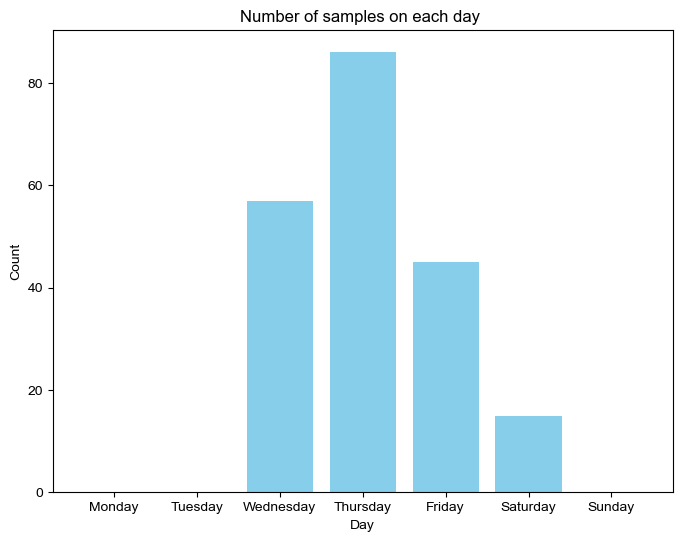

In [282]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')

# Extract the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
df['Day_of_Week'] = df['Timestamp'].dt.dayofweek

# Define the labels for days of the week
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count the number of occurrences for each day of the week
day_counts = df['Day_of_Week'].value_counts().sort_index()

# Ensure day_counts has the same length as day_labels
day_counts = day_counts.reindex(range(7), fill_value=0)

plt.figure(figsize=(8, 6))
# Plot a bar chart
plt.bar(day_labels, day_counts, color='skyblue')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Number of samples on each day ')
plt.show()

In [283]:

df['Time stamp time'] = pd.to_datetime(df['Timestamp']).apply(lambda x: x.time())
df['Start time of survey']=pd.to_datetime(df['Start time of survey'])
df['Start time of survey'] = df['Start time of survey'].apply(lambda x: datetime.strftime(x, '%H:%M:%S'))


C:\Users\PC\AppData\Local\Temp\ipykernel_162428\800887808.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start time of survey']=pd.to_datetime(df['Start time of survey'])


In [284]:
time_diffs = []

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    # Convert the time string to datetime.time object
    time_obj = datetime.strptime(row.iloc[1], '%H:%M:%S').time()  
    # time_obj = datetime.strptime(row.iloc[50], '%H:%M:%S').time()
  
    
    # Calculate the time difference between two columns in minutes
    time_diff_minutes = (datetime.combine(date.today(), row.iloc[50]) - datetime.combine(date.today(), time_obj)).total_seconds() / 60

    # Append the time difference to the list
    time_diffs.append(time_diff_minutes)

# Add the list as a new column in the DataFrame
df['time_diff'] = time_diffs

In [285]:
# # for each unique value of column 1, print the average value of time_diff
# for name in df['1'].unique():
#     print(name, df[df['1'] == name]['time_diff'].mean())

In [286]:
# df['Person_Index'] = df.groupby('1').cumcount()

# # Plotting
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='Person_Index', y='time_diff', hue='1', marker='o')
# plt.xlabel('No of samples')
# plt.ylabel('Time Taken (minutes)')
# plt.title('Time Taken to Complete Task by Person')
# plt.grid(True)
# plt.legend(title='Person')
# plt.show()

### Sample collection at different times of day

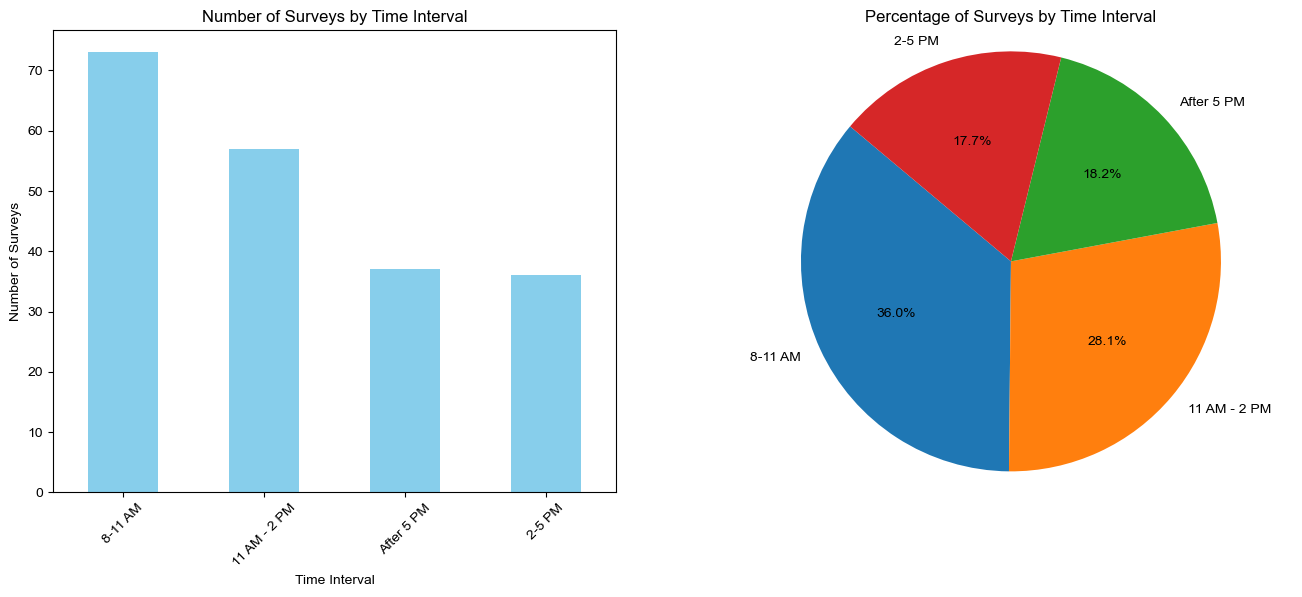

In [287]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')

# Define time intervals
time_intervals = [(8, 11), (11, 14), (14, 17), (17, 20)]

# Create labels for time intervals
labels = ['8-11 AM', '11 AM - 2 PM', '2-5 PM', 'After 5 PM']

# Categorize timestamps into time intervals
def categorize_time(timestamp):
    hour = timestamp.hour
    for interval, label in zip(time_intervals, labels):
        if interval[0] <= hour < interval[1]:
            return label
    return 'After 5 PM'

df['Time Interval'] = df['Timestamp'].apply(categorize_time)

# Calculate value counts for each time interval
value_counts = df['Time Interval'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

value_counts.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Number of Surveys by Time Interval')
axes[0].set_xlabel('Time Interval')
axes[0].set_ylabel('Number of Surveys')
axes[0].tick_params(axis='x', rotation=45)

# Plot pie chart
axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Percentage of Surveys by Time Interval')
axes[1].axis('equal')

plt.show()

### Gender proportion in the sample

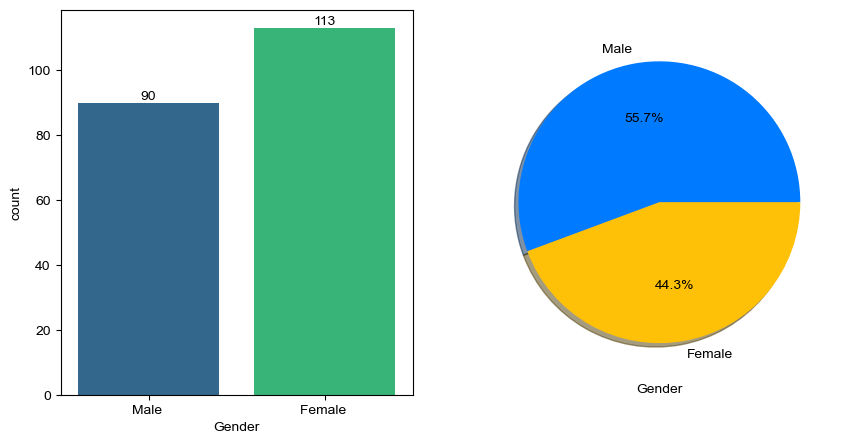

In [288]:
f,ax=plt.subplots(1,2,figsize=(10,5))

sns.countplot(x=df['17'],data=df,palette='viridis',ax=ax[0],saturation=0.95)
ax[0].xaxis.set_label_text('Gender')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
plt.pie(x=df['17'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%',shadow=True,colors=['#007bff','#ffc107'])
plt.xlabel('Gender')
plt.show()

### Different Age groups covered in the sample

(-1.099997689023834,
 1.099999889953516,
 -1.0999954616912038,
 1.0999969800638922)

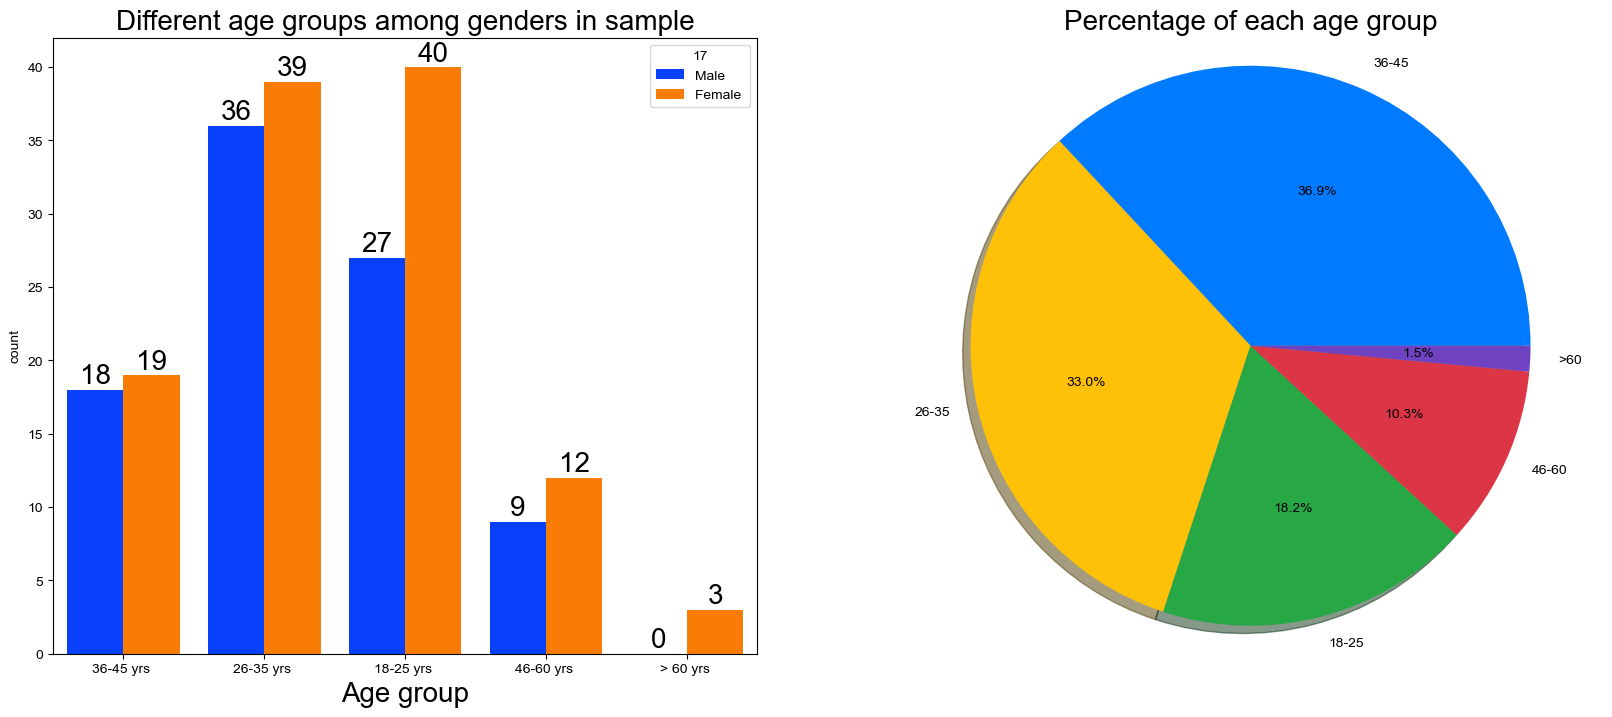

In [289]:
plt.rcParams['font.family'] = 'Arial'
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['18'],data=df,palette = 'bright',hue='17',saturation=0.95,ax=ax[0])
ax[0].set_title('Different age groups among genders in sample',color='black',size=20)
ax[0].xaxis.set_label_text('Age group',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.subplot(1, 2, 2)
plt.pie(x=df['18'].value_counts(), labels=['36-45', '26-35', '18-25', '46-60', '>60'], autopct='%1.1f%%', shadow=True,
         colors = ['#007bff', '#ffc107', '#28a745', '#dc3545', '#6f42c1'])
plt.title('Percentage of each age group', size=20)
plt.axis('equal') 

### Count of origin and destination types reported by respondents

In [290]:
place_dict={ 'Social/Religious place ':'Social', 'Friend/Relative’s place ':'Friend place',
       'Work/Business place ':'Work', 'School/College ':'College', 'Shopping place ':'Shopping'
       }
df['6']=df['6'].map(place_dict).fillna(df['6'])
df['4']=df['4'].map(place_dict).fillna(df['4'])

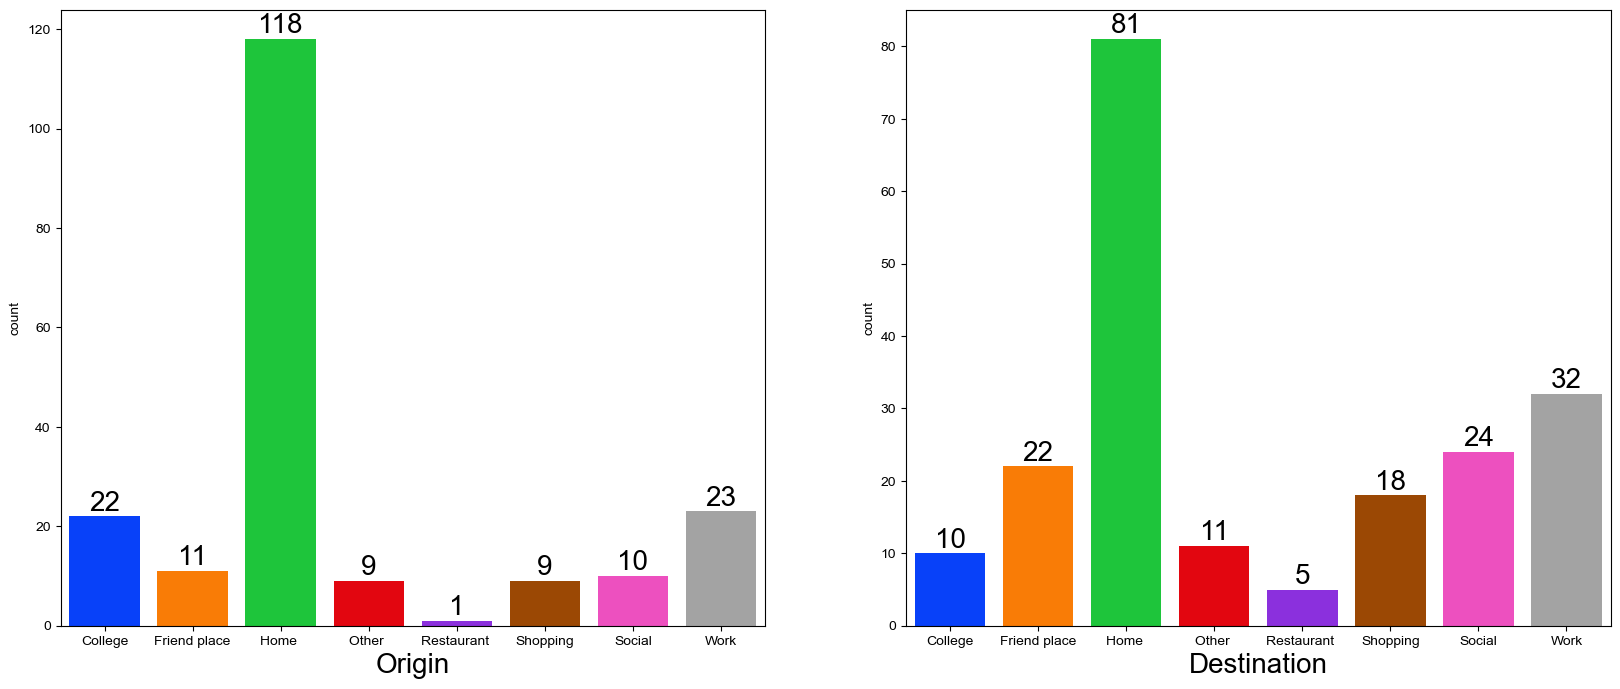

In [291]:
df_sorted_origin = df.sort_values(by='6')
df_sorted_destination = df.sort_values(by='4')

# Set font family
plt.rcParams['font.family'] = 'Arial'

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Count plot for origin types
sns.countplot(x=df_sorted_origin['6'], data=df_sorted_origin, palette='bright', saturation=0.95, ax=ax[0])
# ax[0].set_title('Value counts of origin types', color='black', size=20)
ax[0].xaxis.set_label_text('Origin', size=20)
ax[0].tick_params(axis='x', rotation=0)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Count plot for destination
sns.countplot(x=df_sorted_destination['4'], data=df_sorted_destination, palette='bright', saturation=0.95, ax=ax[1])
ax[1].xaxis.set_label_text('Destination', size=20)
ax[1].tick_params(axis='x', rotation=0)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.show()

#### Mapping of different origins to destinations

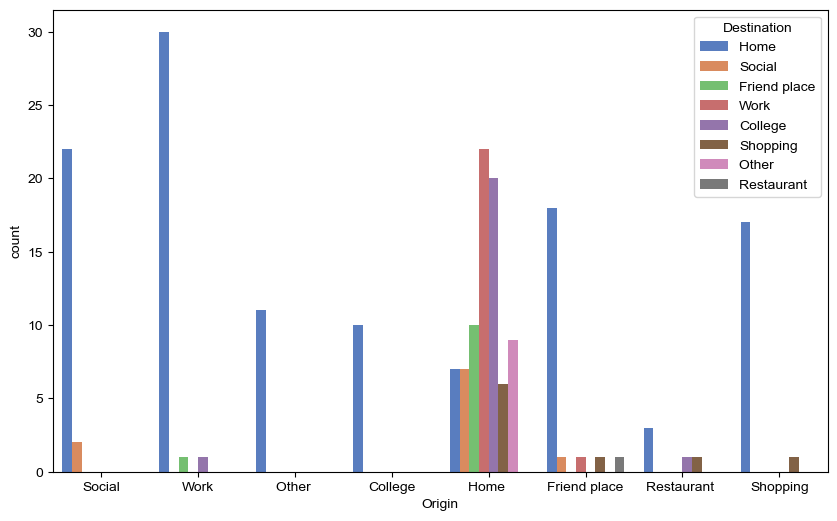

In [292]:
plt.figure(figsize=(10, 6))
sns.countplot(x='4', hue='6', data=df, palette='muted')
# plt.title('Clustered Bar Chart of Two Categorical Columns')
plt.xlabel('Origin')
plt.xticks(rotation=0)
plt.legend(title='Destination')
plt.show()


#### Counts of access and egress modes reported in the sample

In [293]:
mode_dict={'Drove and parked a two-Wheeler ':'Drove two-wheeler',
       'Dropped-off by friends/family members/others using two-wheeler ':'two-wheeler drop',
       'Drove and parked a car ':'Drove car', 'Auto Rickshaw ':'Auto', 'Ola/Uber car ':'Ola car',
       'Dropped-off by friends/family members/others using car ':'Car drop-off '}
df['10']=df['10'].map(mode_dict).fillna(df['10'])
df['11']=df['11'].map(mode_dict).fillna(df['11'])
# df['10'].unique()

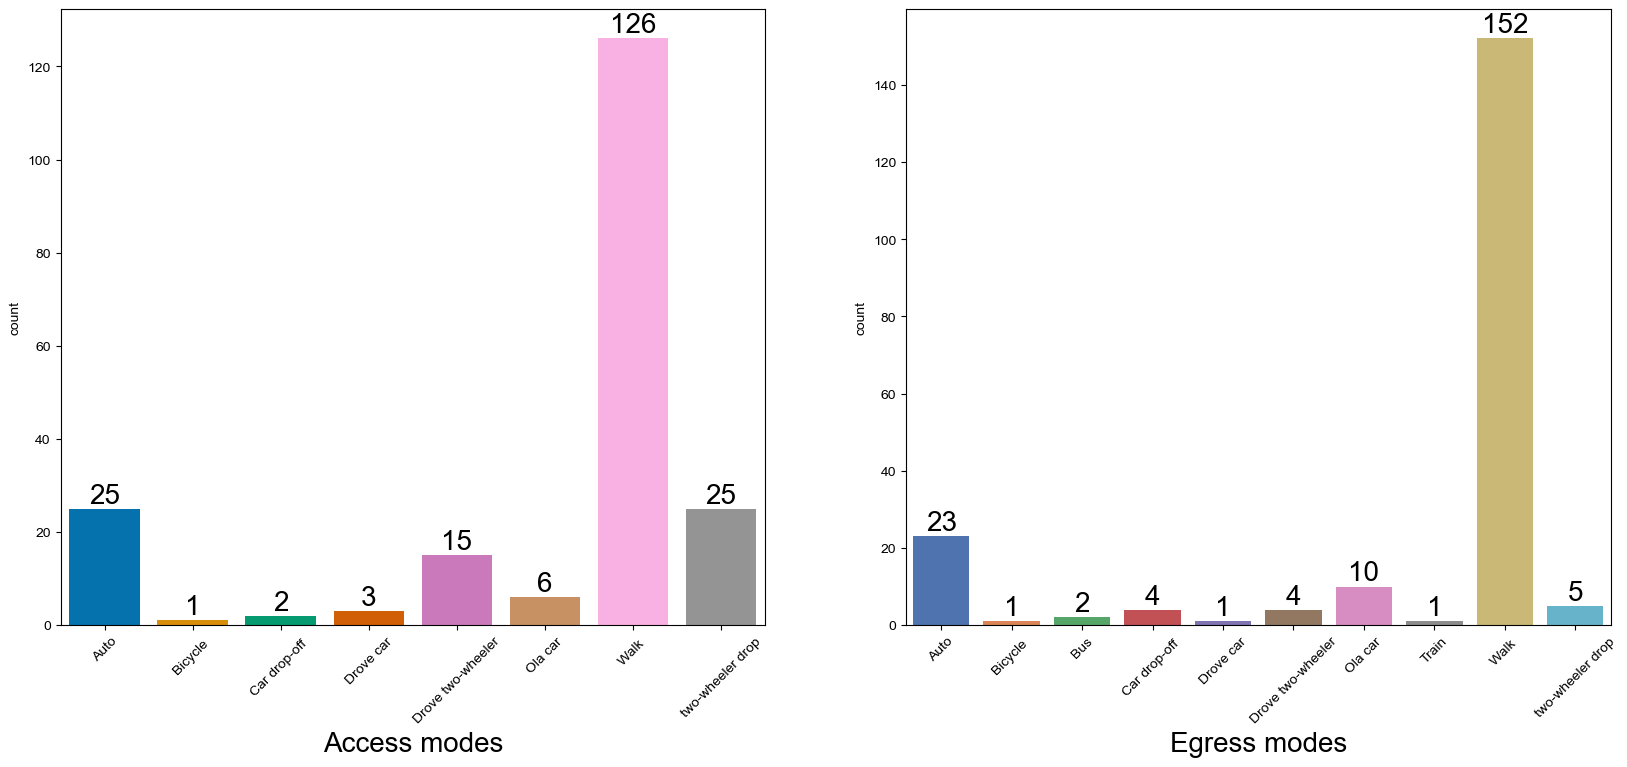

In [294]:
df_sorted_origin = df.sort_values(by='10')
df_sorted_destination = df.sort_values(by='11')

# Set font family
plt.rcParams['font.family'] = 'Arial'

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Count plot for origin types
sns.countplot(x=df_sorted_origin['10'], data=df_sorted_origin, palette='colorblind', saturation=0.95, ax=ax[0])
# ax[0].set_title('Value counts of origin types', color='black', size=20)
ax[0].xaxis.set_label_text('Access modes', size=20)
ax[0].tick_params(axis='x', rotation=45)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Count plot for destination
sns.countplot(x=df_sorted_destination['11'], data=df_sorted_destination, palette='deep', saturation=0.95, ax=ax[1])
ax[1].xaxis.set_label_text('Egress modes', size=20)
ax[1].tick_params(axis='x', rotation=45)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.show()

In [295]:
# # Create subplots with 1 row and 2 columns
# fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# # Value counts and word cloud for first column '2c'
# value_counts_2c = df['2c'].value_counts()
# wordcloud_2c = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(value_counts_2c)
# axs[0].imshow(wordcloud_2c, interpolation='bilinear')
# axs[0].axis('off')


# # Value counts and word cloud for second column '2d'
# value_counts_2d = df['2d'].value_counts()
# wordcloud_2d = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(value_counts_2d)
# axs[1].imshow(wordcloud_2d, interpolation='bilinear')
# axs[1].axis('off')


# Display the subplots
# plt.show()


#### Sample counts at different stations

In [296]:
station_dict={'Nadaprabhu Kempegowda Station, Majestic ':'Majestic','Dr. B. R. Ambedkar Station, Vidhana Soudha ':'Vidhana Soudha',
              'Mantri Square Sampige Road ':'Mantri Square','Sir.M.Visvesvaraya Stn., Central College ':'Central College',
              'Benniganahalli - Tin factory ':'Benniganahalli','Whitefield - Kadugodi ':'Whitefield','Kengeri Bus Terminal ':'Kengeri BT',
              'Krishnarajapuram - K.R.Puram ':'KR Puram','Rashtreeya Vidyalaya Road ':'RV Road','Hopefarm Channasandra ':'Hopefarm',
              'Krantivira Sangolli Rayanna Railway Station ':'Krantivira','Mahakavi Kuvempu Road ':'Mahakavi Kuvempu',
              'Krishna Rajendra Market ':'KR Market','Sri Sathya Sai Hospital ':'Sathya Sai','Swami Vivekananda Road ':'Vivekananda Road'}
df['2c']=df['2c'].map(station_dict).fillna(df['2c'])
df['2d']=df['2d'].map(station_dict).fillna(df['2d'])

In [297]:
# Get value counts for column '2c'
value_counts_2c = df['2c'].value_counts()

# Get value counts for column '2d'
value_counts_2d = df['2d'].value_counts()

# Combine the value counts for both columns
combined_value_counts = value_counts_2c.add(value_counts_2d, fill_value=0)

combined_value_counts = combined_value_counts.astype(int)

# Sort the combined value counts in descending order
combined_value_counts_sorted = combined_value_counts.sort_values(ascending=False)

# Calculate the midpoint for splitting the data
midpoint = len(combined_value_counts_sorted) // 3

# Print the table with three pairs of stations and sample counts in a row
print("Station              Sample count      | Station              Sample count      | Station              Sample count")
print("---------------------------------------+----------------------------------------+-----------------------------------")
for i in range(min(midpoint, len(combined_value_counts_sorted))):
    station_1, count_1 = combined_value_counts_sorted.index[i], combined_value_counts_sorted.iloc[i]
    station_2, count_2 = combined_value_counts_sorted.index[midpoint + i], combined_value_counts_sorted.iloc[midpoint + i]
    station_3, count_3 = combined_value_counts_sorted.index[midpoint * 2 + i], combined_value_counts_sorted.iloc[midpoint * 2 + i]
    print(f"{station_1:<20}   {count_1:<15} | {station_2:<20}   {count_2:<15} | {station_3:<20}       {count_3:<15}")


Station              Sample count      | Station              Sample count      | Station              Sample count
---------------------------------------+----------------------------------------+-----------------------------------
Majestic               35              | Central College        7               | Mahatma Gandhi Road        4              
Nagasandra             25              | Rajajinagar            6               | Kengeri BT                 4              
Whitefield             16              | Indiranagar            6               | Deepanjali Nagar           3              
Mahalakshmi            14              | Lalbagh                6               | Garudacharapalya           3              
Hoodi                  13              | Sandal Soap Factory    6               | Goraguntepalya             3              
Challaghatta           13              | Jayaprakash Nagar      6               | Nallurhalli                3              
Silk Institute   

#### 12a. perception of traffic on bicycling 

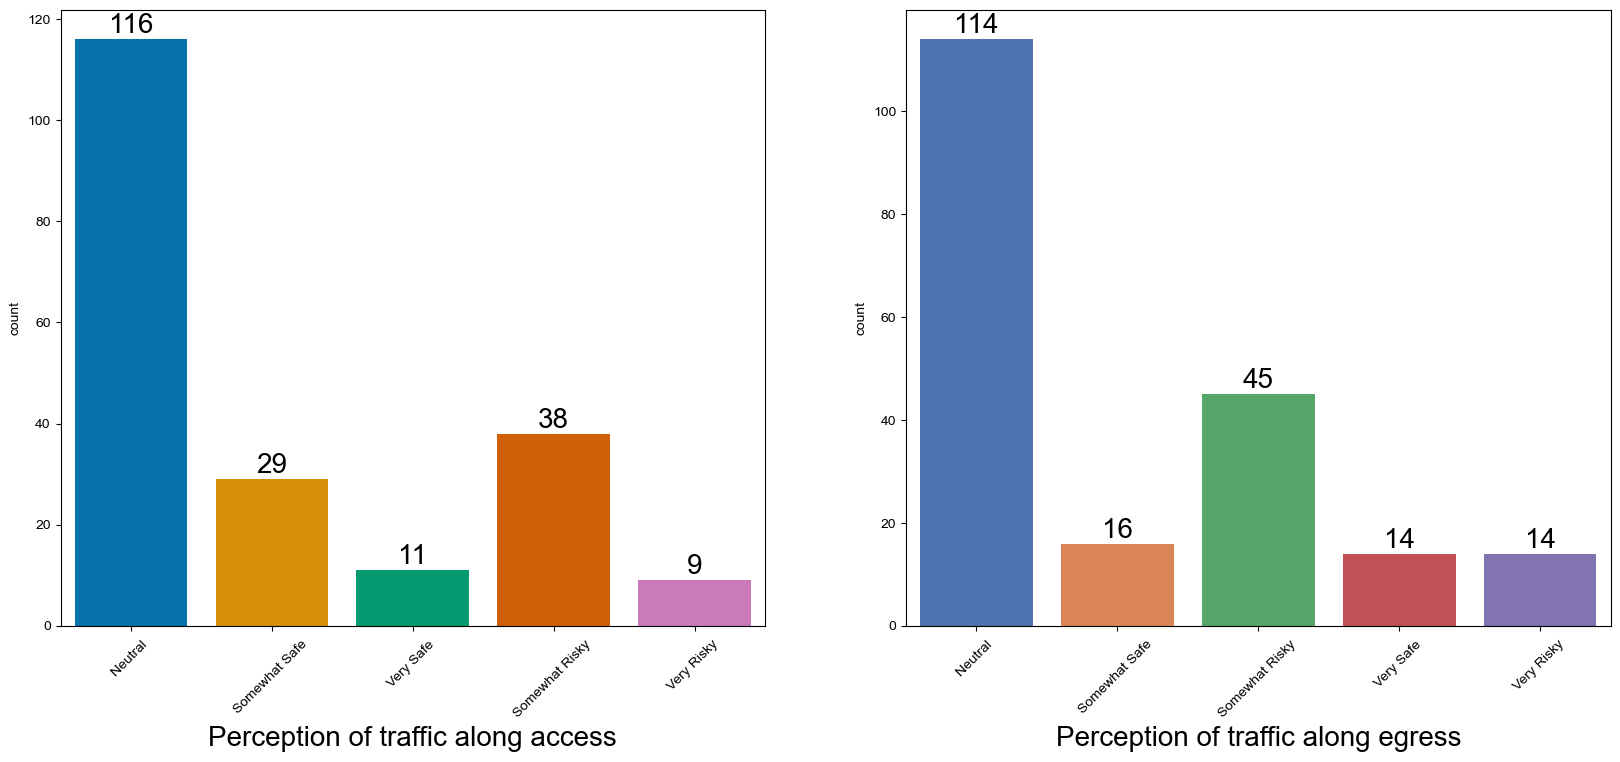

In [298]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Count plot for origin types
sns.countplot(x='12a', data=df, palette='colorblind', saturation=0.95, ax=ax[0])
# ax[0].set_title('Perception of traffic along access', color='black', size=20)
ax[0].xaxis.set_label_text('Perception of traffic along access', size=20)
ax[0].tick_params(axis='x', rotation=45)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Count plot for destination
sns.countplot(x='12b', data=df, palette='deep', saturation=0.95, ax=ax[1])
ax[1].xaxis.set_label_text('Perception of traffic along egress', size=20)
# ax[1].set_title('', color='black', size=20)
ax[1].tick_params(axis='x', rotation=45)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.show()

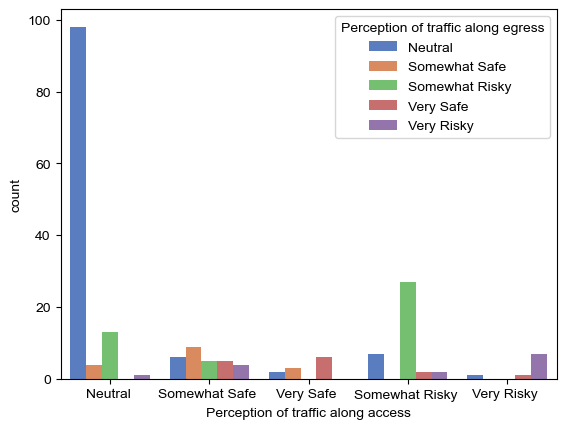

In [299]:
sns.countplot(x='12a', hue='12b', data=df, palette='muted')
# plt.title('Clustered Bar Chart of Two Categorical Columns')
plt.xlabel('Perception of traffic along access')
plt.legend(title='Perception of traffic along egress')
plt.show()

#### Counts of access and egress distance ranges observed

In [300]:
custom_order = ['< 0.5 km ', '0.5 to 1 km ', '1 km to 1.5 km ','1.5 km to 2 km ','2 km to 2.5 km ', 
                '2.5 km to 3 km ','3 km to 3.5 km ','3.5 km to 4 km ', '4 km to 4.5 km ', 
                '4.5 km to 5 km ','> 5 km ']

# Convert the custom order to a categorical data type
custom_dtype = pd.CategoricalDtype(categories=custom_order, ordered=True)

# Assuming df is your DataFrame containing columns 10b and 10c
df['10b'] = df['10b'].astype(custom_dtype)
df['11b'] = df['11b'].astype(custom_dtype)

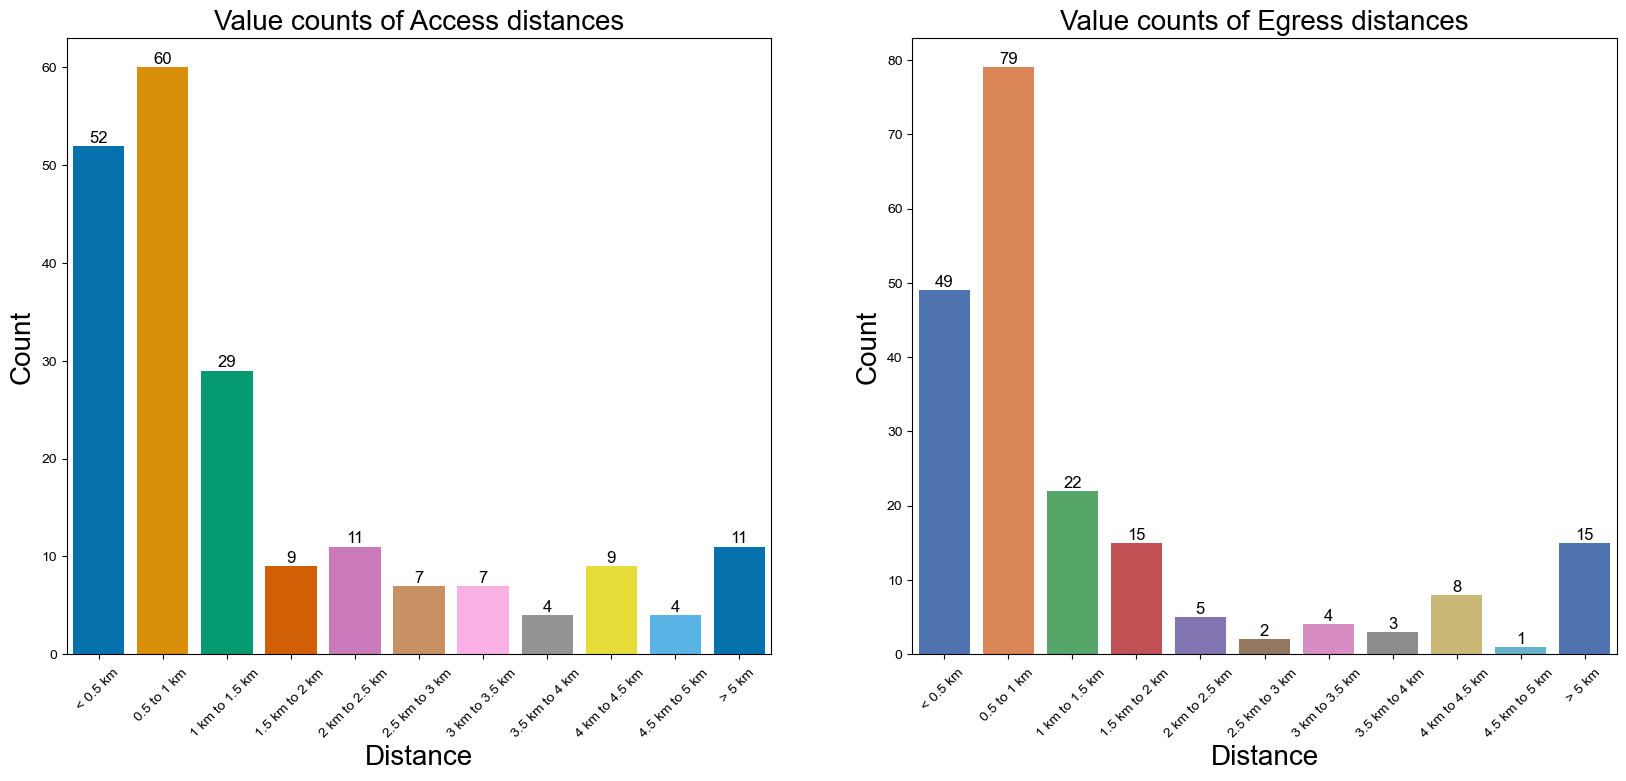

In [301]:
# Count the values in columns 10b and 11b
value_counts_10b = df['10b'].value_counts()
value_counts_11b = df['11b'].value_counts()

# Sort the values according to the custom order
value_counts_10b_sorted = value_counts_10b.reindex(custom_order)
value_counts_11b_sorted = value_counts_11b.reindex(custom_order)

# Set font family
plt.rcParams['font.family'] = 'Arial'

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Count plot for origin types
sns.barplot(x=value_counts_10b_sorted.index, y=value_counts_10b_sorted.values, palette='colorblind', saturation=0.95, ax=ax[0])
ax[0].set_title('Value counts of Access distances', color='black', size=20)
ax[0].xaxis.set_label_text('Distance', size=20)
ax[0].yaxis.set_label_text('Count', size=20)
ax[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(value_counts_10b_sorted.values):
    ax[0].text(i, v + 0.05, str(v), ha='center', va='bottom', color='black', size=12)

# Count plot for destination
sns.barplot(x=value_counts_11b_sorted.index, y=value_counts_11b_sorted.values, palette='deep', saturation=0.95, ax=ax[1])
ax[1].xaxis.set_label_text('Distance', size=20)
ax[1].yaxis.set_label_text('Count', size=20)
ax[1].set_title('Value counts of Egress distances', color='black', size=20)
ax[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(value_counts_11b_sorted.values):
    ax[1].text(i, v + 0.05, str(v), ha='center', va='bottom', color='black', size=12)

plt.show()

#### When no special cycling facility is provided

(-1.099999924571758, 1.099999996408179, -1.099999839779496, 1.0999990875888672)

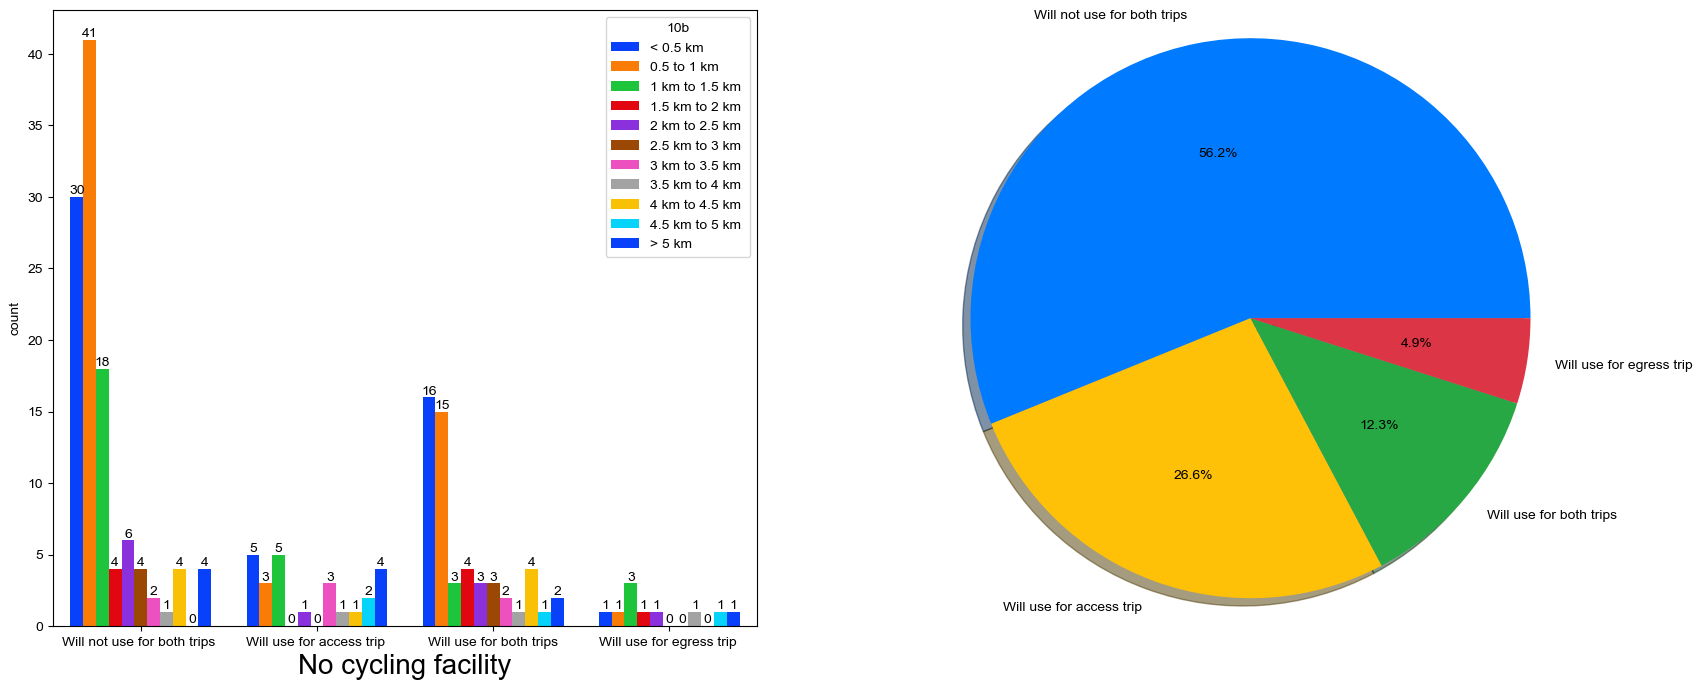

In [302]:
plt.rcParams['font.family'] = 'Arial'
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['12c(a)'],data=df,hue='10b',palette = 'bright',saturation=0.95,ax=ax[0])
# ax[0].set_title('Different age groups among genders in sample',color='black',size=20)
ax[0].xaxis.set_label_text('No cycling facility',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.subplot(1, 2, 2)
plt.pie(x=df['12c(a)'].value_counts(),labels=['Will not use for both trips ', 'Will use for access trip ',
       'Will use for both trips', 'Will use for egress trip '], autopct='%1.1f%%', shadow=True,
         colors = ['#007bff', '#ffc107', '#28a745', '#dc3545', '#6f42c1'])
# plt.title('Percentage', size=20)
plt.axis('equal') 

#### Response for various facilities summarized

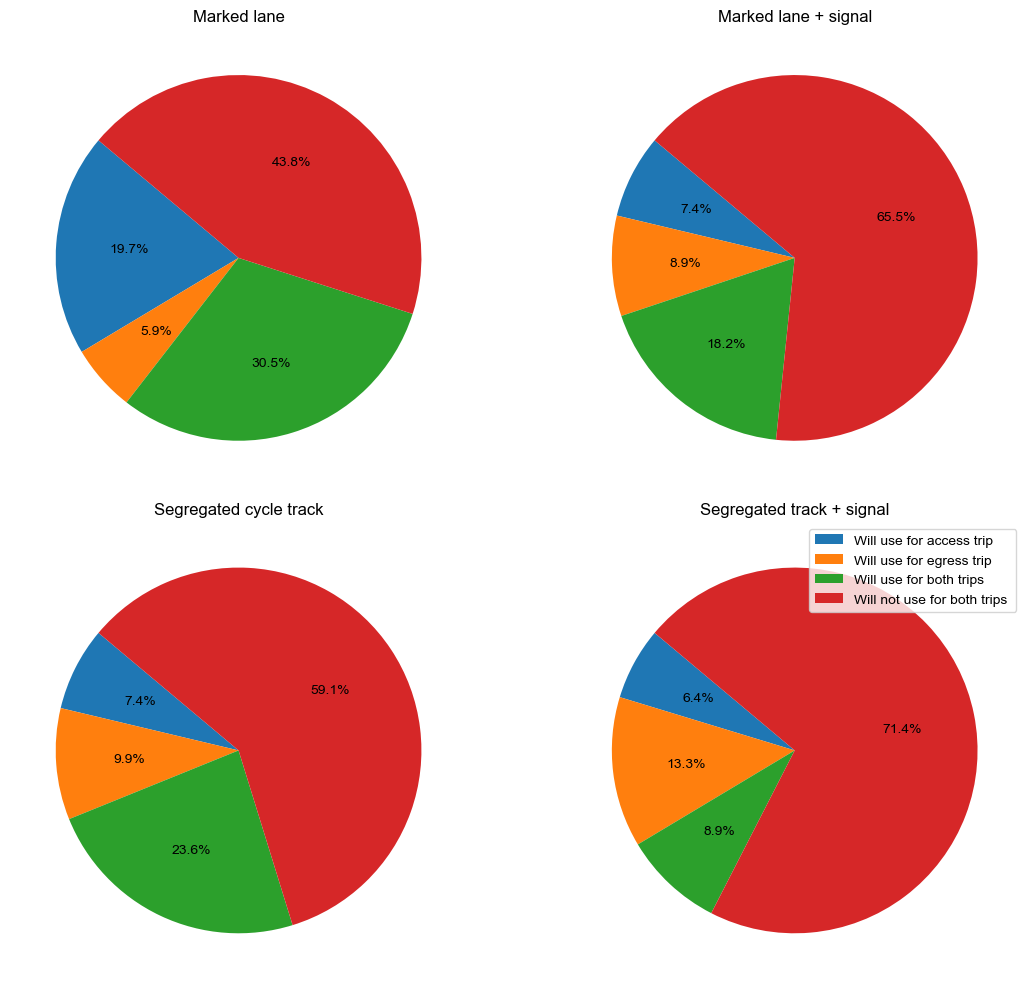

In [311]:
# Define the column names
columns = ['12c(b)', '12c(c)', '12c(d)', '12c(e)']

# Define individual titles for each plot
titles = ['Marked lane', 'Marked lane + signal', 'Segregated cycle track', 'Segregated track + signal']

# Define the order of legend and values
list_order = ['Will use for access trip ', 'Will use for egress trip ', 'Will use for both trips', 'Will not use for both trips ']

# Calculate the number of rows required
num_rows = (len(columns) + 1) // 2

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 5*num_rows))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axs = axs.reshape(1, -1)

# Iterate over each column and plot a pie chart
for i, column in enumerate(columns):
    row_index = i // 2
    col_index = i % 2
    
    # Calculate value counts for the column
    counts = df[column].value_counts()[list_order]
    
    # Plot the pie chart without labels
    axs[row_index, col_index].pie(counts, labels=None, autopct='%1.1f%%', startangle=140)
    
    # Set individual titles for each chart
    axs[row_index, col_index].set_title(titles[i])

# Add legend to the top-right corner
plt.legend(list_order, loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [314]:
parking_dict={'No, I will not use a bicycle. ':'Will not use',
       'Current travelling conditions with no special cycling facility. Per Trip cost 0₹. Parking cost of 10₹ per day. ':'Current conditions',
       'If a marked cycle lane is provided. Per Trip cost 1₹. Parking cost 10₹ per day. ':'Marked lane',
       'Not Applicable- because neither of my trip end is home. ':'NA',
       'If a marked cycle lane provided along with bicycle traffic signals is provided. Per Trip cost 2₹. Parking cost 10₹ per day. ':'Marked lane + signal',
       'If a segregated cycle track is provided. Per Trip cost 3₹.. Parking cost 10₹ per day. ':'Segregated track',
       'If a segregated cycle track with bicycle signal is provided. Per Trip cost 4₹. Parking cost 10₹ per day. ':'Segregated track + signal'}

df['23']=df['23'].map(parking_dict).fillna(df['23'])

c:\Users\PC\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


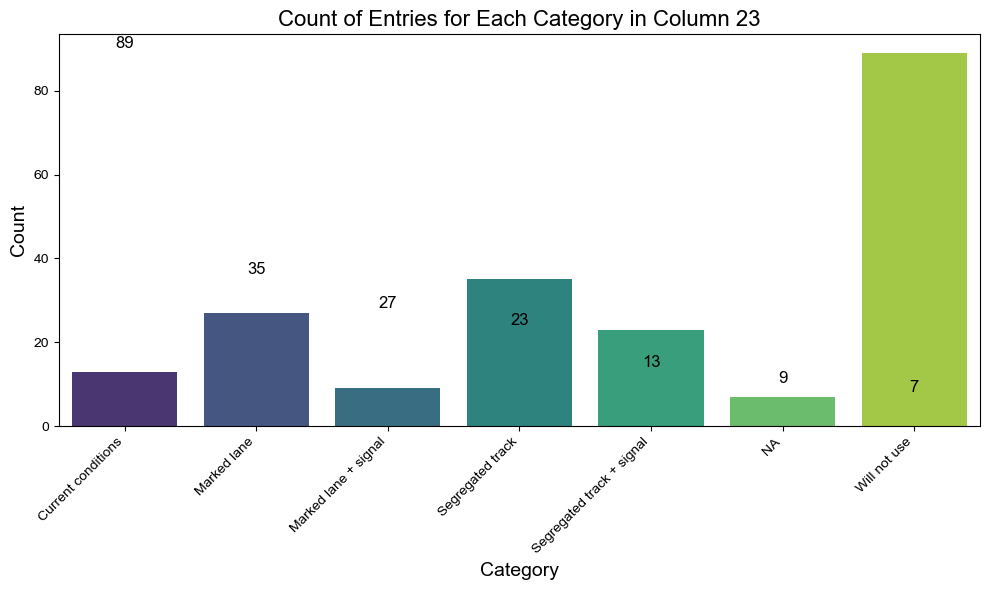

In [320]:
# Define the ordered list of categories
ordered_list = ['Current conditions', 'Marked lane', 'Marked lane + signal', 
                'Segregated track', 'Segregated track + signal', 'NA', 'Will not use']

# Reorder the categories in column 23 based on the ordered list
df['23'] = pd.Categorical(df['23'], categories=ordered_list, ordered=True)

# Count the number of entries for each category
counts = df['23'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=counts.index, y=counts.values, order=ordered_list, palette='viridis')

# Add count values on top of each bar
for i, count in enumerate(counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Count of Entries for Each Category in Column 23', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# print the count of number of rows where column 6 and 4 both does not equal Home



(-1.099999619015082, 1.099999981857861, -1.099999561289288, 1.09999272008802)

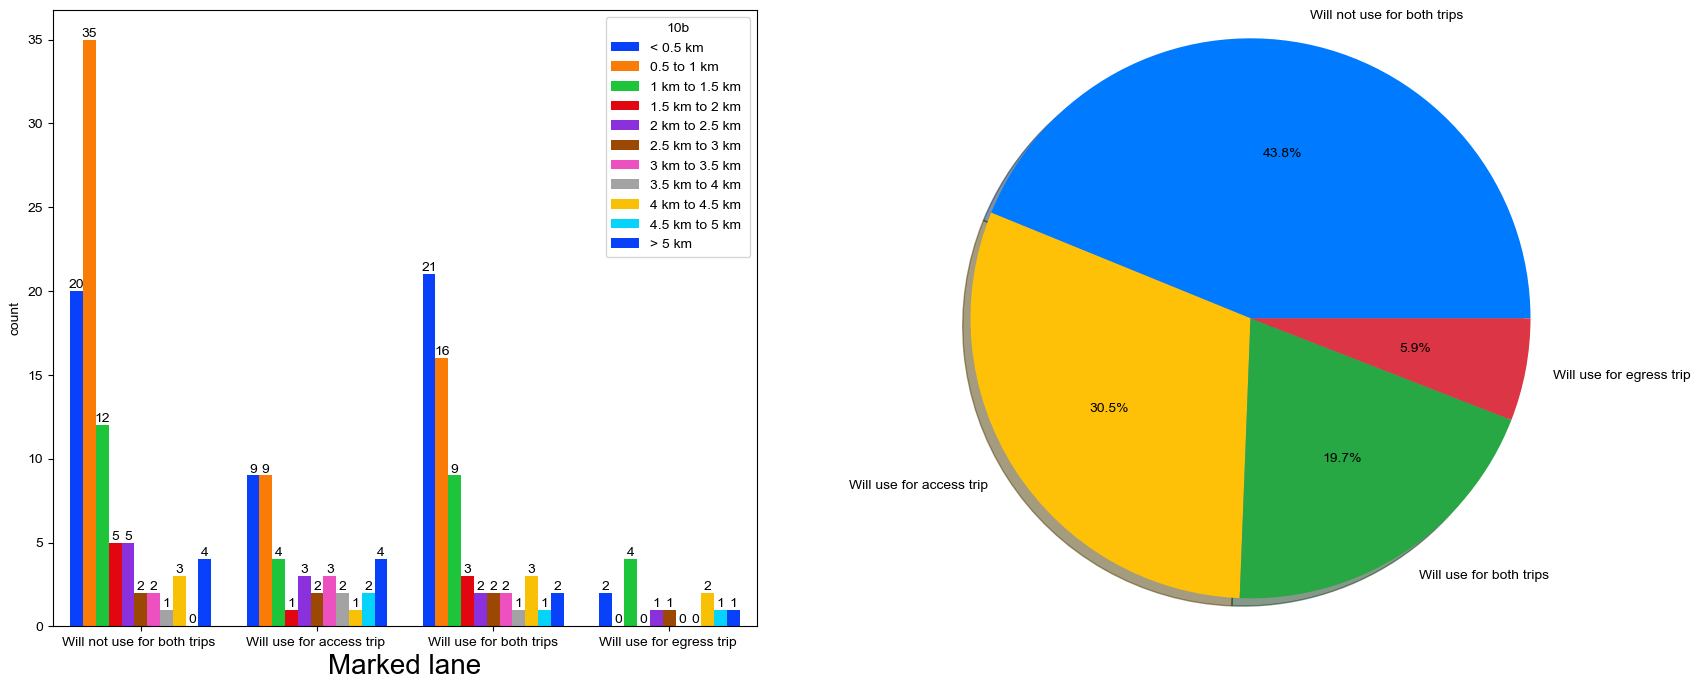

In [303]:
plt.rcParams['font.family'] = 'Arial'
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['12c(b)'],data=df,hue='10b',palette = 'bright',saturation=0.95,ax=ax[0])
# ax[0].set_title('Different age groups among genders in sample',color='black',size=20)
ax[0].xaxis.set_label_text('Marked lane',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.subplot(1, 2, 2)
plt.pie(x=df['12c(b)'].value_counts(),labels=['Will not use for both trips ', 'Will use for access trip ',
       'Will use for both trips', 'Will use for egress trip '], autopct='%1.1f%%', shadow=True,
         colors = ['#007bff', '#ffc107', '#28a745', '#dc3545', '#6f42c1'])
# plt.title('Percentage', size=20)
plt.axis('equal') 

(-1.0999998730483054,
 1.0999999939546812,
 -1.0999999822097228,
 1.0999999804122509)

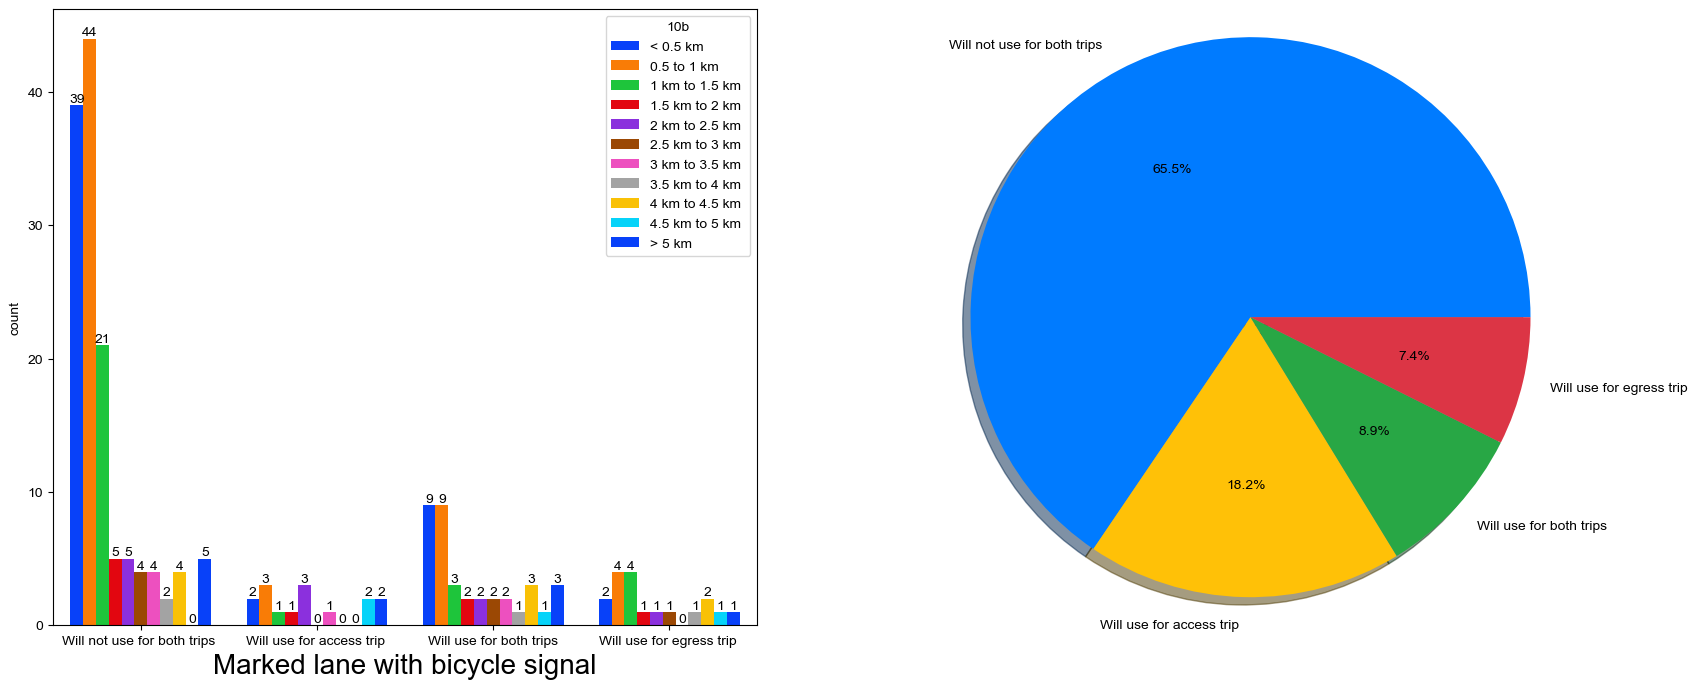

In [304]:
plt.rcParams['font.family'] = 'Arial'
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['12c(c)'],data=df,hue='10b',palette = 'bright',saturation=0.95,ax=ax[0])
# ax[0].set_title('Different age groups among genders in sample',color='black',size=20)
ax[0].xaxis.set_label_text('Marked lane with bicycle signal',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.subplot(1, 2, 2)
plt.pie(x=df['12c(c)'].value_counts(),labels=['Will not use for both trips ', 'Will use for access trip ',
       'Will use for both trips', 'Will use for egress trip '], autopct='%1.1f%%', shadow=True,
         colors = ['#007bff', '#ffc107', '#28a745', '#dc3545', '#6f42c1'])
# plt.title('Percentage', size=20)
plt.axis('equal') 

(-1.0999995283699486,
 1.0999999775414262,
 -1.0999839122894752,
 1.09999814473582)

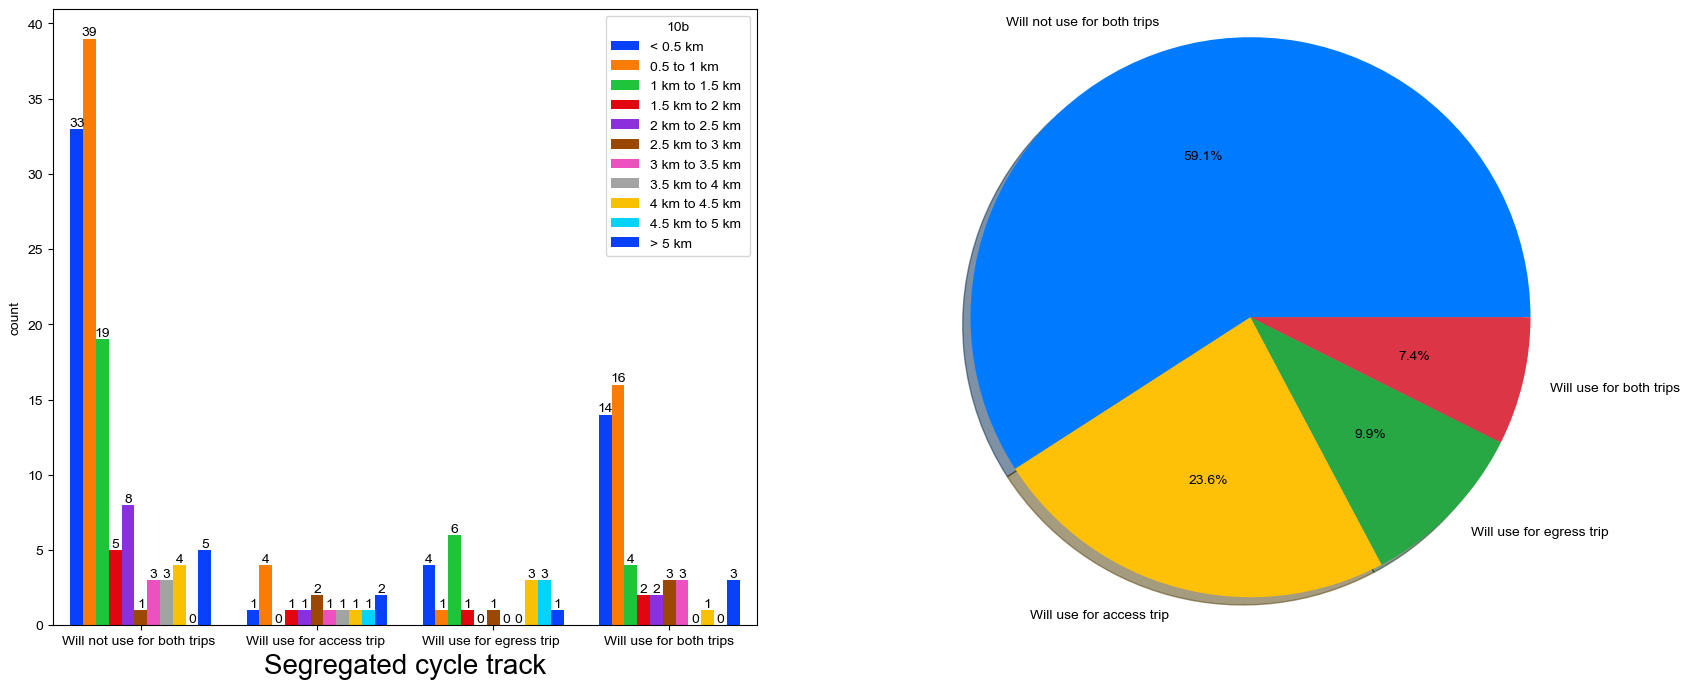

In [305]:
plt.rcParams['font.family'] = 'Arial'
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['12c(d)'],data=df,hue='10b',palette = 'bright',saturation=0.95,ax=ax[0])
# ax[0].set_title('Different age groups among genders in sample',color='black',size=20)
ax[0].xaxis.set_label_text('Segregated cycle track',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.subplot(1, 2, 2)
plt.pie(x=df['12c(d)'].value_counts(),labels=['Will not use for both trips ', 'Will use for access trip ',
       'Will use for egress trip ', 'Will use for both trips'], autopct='%1.1f%%', shadow=True,
         colors = ['#007bff', '#ffc107', '#28a745', '#dc3545', '#6f42c1'])
# plt.title('Percentage', size=20)
plt.axis('equal') 

(-1.0999964334444876,
 1.0999998301640233,
 -1.099999275372431,
 1.0999989177940224)

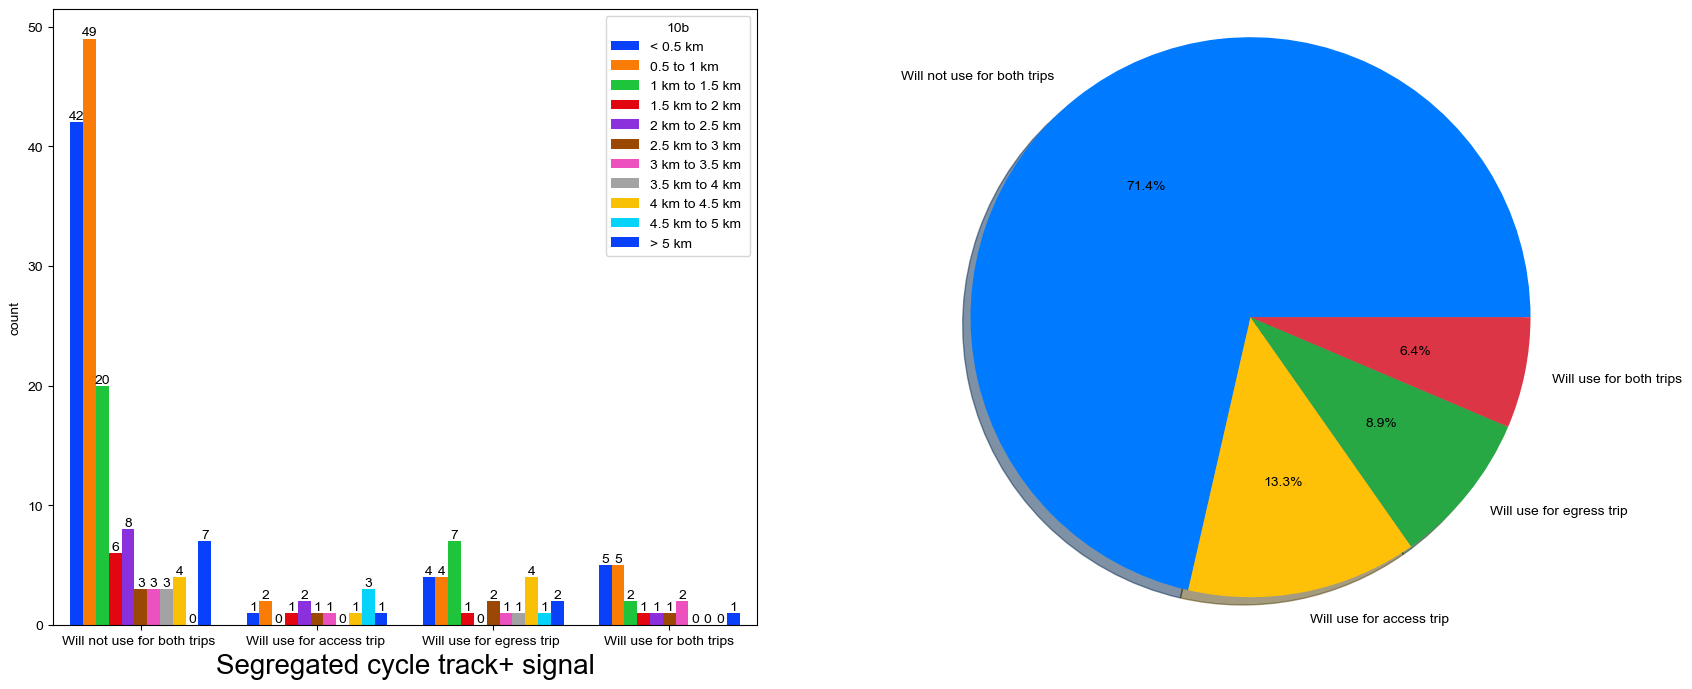

In [306]:
plt.rcParams['font.family'] = 'Arial'
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['12c(e)'],data=df,hue='10b',palette = 'bright',saturation=0.95,ax=ax[0])
# ax[0].set_title('Different age groups among genders in sample',color='black',size=20)
ax[0].xaxis.set_label_text('Segregated cycle track+ signal',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.subplot(1, 2, 2)
plt.pie(x=df['12c(e)'].value_counts(),labels=['Will not use for both trips ', 'Will use for access trip ',
       'Will use for egress trip ', 'Will use for both trips'], autopct='%1.1f%%', shadow=True,
         colors = ['#007bff', '#ffc107', '#28a745', '#dc3545', '#6f42c1'])
# plt.title('Percentage', size=20)
plt.axis('equal') 